# Galician Context Free Grammar
Sara Han

For this task, we will make a Galician Context Free Grammar. As it is a Context Free Grammar we will not deal with issues as concordance or the upper case letter, otherwise, we would have to work with an unified grammar. Thus, we will just focus on the syntatic analysis of the most common structures (an order) used in this language.

More information in English about the Galician syntax:
* http://consellodacultura.gal/cdsg/loia/gramatica.php?idioma=2
* https://www.orbilat.com/Languages/Galician/Grammar/index.html

## Initializations


In [495]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
!pip install svgling
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates 

## Loading the Galician CFG
In this section, we will write the grammar we will be using to analyze our sentences.

In [496]:
import nltk
from nltk import CFG
from IPython.display import display

grammar = CFG.fromstring("""
   S -> NP VP PUNCTF | ADVP NP VP PUNCTF | ADVP PUNCTM NP VP PUNCTF | PP NP VP PUNCTF | PP PUNCTM NP VP PUNCTF | VP PUNCTF | ADVP VP PUNCTF | PP VP PUNCTF | PP PUNCTM VP PUNCTF | S1 COORD S1 PUNCTF | VP | ADVP  VP | NP VP | ADVP NP VP | PP NP VP | PP VP | VP NP VP PUNCTF
   S1 -> NP VP PUNCTM | ADVP NP VP PUNCTM | PP NP VP PUNCTM | VP PUNCTM | ADVP VP PUNCTM | PP VP PUNCTM | VP | ADVP  VP | NP VP | ADVP NP VP | PP NP VP | PP VP
   NP -> N | PRON | ART N | DET N | ART DET N | ART PRON | DET ADJP N | ART ADJP N | DET N ADJP | ART N ADJP | DET ADJP N ADJP | ART ADJP N ADJP | NP PP | NP COORD NP | NP REL S1 | NP PUNCTM REL S1
   NP1 -> N | PRON | ART N | DET N | ART DET N | ART PRON | DET ADJP N | ART ADJP N | DET N ADJP | ART N ADJP | DET ADJP N ADJP | ART ADJP N ADJP
   ADJP -> ADJ | ADVP ADJ | ADJP COORD ADJP | ADJ PUNCTM ADJ
   VP -> VP1 | VP1 ADJP | VP1 NP | VP1 PP | VP1 PP PP | NEG VP1 | VP1 ADVP | NEG VP1 ADVP | VP1 PP ADVP | VP1 ADVP PP | VP SUB S1 | VP1 SUBM S1 | SUB S1
   VP1 -> V | V V
   PP -> P NP1 | PP COORD PP
   ADVP -> ADV  | ADV ADVP | ADVP COORD ADVP
   ART -> 'o' | 'os' | 'a' | 'un' | 'unha'
   DET -> DDET | PDET | NDET | INDET | IEDET
   DDET -> 'este' | 'esta'
   PDET -> 'meu' | 'miña' | 'noso'
   NDET -> 'dous'
   INDET -> 'algún'
   IEDET -> 'que'
   N -> CN | PN
   CN -> 'xornalista' | 'tamborileiro' | 'charanga' | 'libreta' | 'tambor' | 'pregunta' | 'resposta' | 'tambores' | 'tamboril' | 'bolígrafos' | 'bolígrafo' | 'desfile' | 'tamborileiros'
   PN -> 'Martiño' | 'Xoán'
   PRON -> PERPRON | DPRON | PPRON | NPRON | INPRON | IEPRON
   PERPRON -> 'el'
   REL -> 'que'
   DPRON -> 'iso'
   PPRON -> 'noso' | 'miña'
   NPRON -> 'dous'
   INPRON -> 'algunha'
   IEPRON -> 'quen'
   ADJ -> 'alto' | 'altos' | 'forte' | 'feliz' | 'bonito'
   V -> VAUX |V/PRON | 'preguntou' | 'respondeu' | 'escribiu' | 'escrita' | 'hai' | 'sarabiou' | 'sarabia' | 'fixo' | 'dixo' | 'tiña' | 'desexaba' | 'desexou' | 'tocará' | 'tocan' | 'tocarán' | 'tocar' | 'tocou' | 'toca'
   VAUX -> 'eran' | 'era'
   V/PRON -> 'preguntoulle'
   P -> P/ART | 'de'
   P/ART -> 'na' | 'no' | 'polo' | 'coa' | 'co' | 'cun' | 'cunha'
   ADV -> 'hoxe' | 'onte' | 'moi' | 'moito' | 'igualmente' | 'tranquilamente' | 'felizmente'
   NEG -> 'non'
   CONJ -> COORD | SUB
   COORD -> 'e' | 'pero' 
   SUB -> 'porque' | 'se'
   SUBM -> 'que'
   PUNCTM -> ','
   PUNCTF -> '.' | '?' | '!'
""")

## Analyzing the sentences
In the following cells, we will explain the different rules written in the grammar, and we will check them parsing some examples and showing their trees thanks to the below function.

Note: senteces were translated literally to better understand the parsing, even if in some cases the English grammar is not right.


In [497]:
def parsing_tree(sentences, grammar=grammar): #inputs: the list of sentences and the grammar
  for sentence in sentences: # iterate through each sentence in the list
    print(sentence + "\n")
    sentence = sentence.split()
    chart_parser = nltk.ChartParser(grammar) # create the parser
    for s in chart_parser.parse(sentence): #show the parser and the tree
      print(s)
      display(s)
      print("\n")

### Morphological rules
In this section, we will mainly focus on the lexical rules. In some cases, there were needed another non-terminal to be more precise morphologically or to avoid ambiguities.
* Articles - ART -> 'o' | 'os' | 'a' | 'un' | 'unha' (the | a )
* Determiner - DET
  * Demostrative determiner - DDET -> 'este' | 'esta'  (this)
  * Possesive determiner - PDET -> 'meu' | 'noso' | 'miña' (my | our )
  * Numeral determiner - NDET -> 'dous'  (two)
  * Indefinite determiner - INDET -> 'algún'  (some)
  * Interrogative and exclamative determiner - IEDET -> 'que'  (what)
* Noun - N
  * Common nouns - CN -> 'xornalista' | 'tamborileiro' | 'charanga' | 'libreta' | 'tambor' | 'pregunta' | 'resposta' | 'tambores' | 'tamboril' | 'bolígrafos' | 'bolígrafo' | 'desfile' | 'tamborileiros'  (journalist | drummer | kind of band | notebook | drum | question | answer | drums | small drum | pens | pen | parade | drummers)
  * Proper nouns - PN -> 'Martiño' | 'Xoán'
* Pronoun - PRON
  * Personal pronoun - PERPRON -> 'el'  (he)
  * Demostrative pronoun - DPRON -> 'iso'  (that)
  * Possesive pronoun - PPRON -> 'noso' | 'miña'  (ours | mine)
  * Numeral pronoun - NPRON -> 'dous'  (two)
  * Indefinite pronoun - INPRON -> 'algunha'  (some)
  * Interrogative and exclamative pronouns - IEPRON -> 'quen'  (who)
* Relative pronoun is not included in pronouns to avoid to confuse them with the other kind of pronouns, whose function and position is different - RPRON -> 'que' (that, which)
* Adjective -ADJ -> 'alto' | 'altos' | 'forte' | 'feliz' | 'bonito'  (tall | strong | happy | nice)
* Verb was divided into the main verbs and also the auxiliary verbs (as the verb to be) - V -> VAUX |V/PRON | 'preguntou' | 'respondeu' | 'escribiu' | 'escrita' | 'hai' | 'sarabiou' | 'sarabia' | 'fixo' | 'dixo' | 'tiña' | 'desexaba' | 'desexou' | 'tocará' | 'tocan' | 'tocarán' | 'tocar' | 'tocou' | 'toca'  (asked | answered | wrote | written | there is, there are | hailed | hail | made | said | had | wanted | will play | play | played)
  * Auxiliar verb - VAUX -> 'eran' | 'era'  (were | was)
  * Contraction with pronouns to mark that this words are contraction of two different morphological categories - V/PRON -> 'preguntoulle'  (asked him/her)
* Preposition - -> P/ART | 'de'  (of)
  * Contraction with articles (same situation as in the contractions above) - P/ART -> 'na' | 'no' | 'polo' | 'coa' | 'co' | 'cun' | 'cunha'  (in the | by | with the | with a)
* Adverb - ADV -> 'hoxe' | 'onte' | 'moi' | 'moito' | 'igualmente' | 'tranquilamente' | 'felizmente'  (today | yesterday | very | a lot | too | calmly | happily)
* Negation, as it is an special adverb that normally is wroten before the verb which is not the common position -> 'non'  (not)

* Conjunctions are not grouped as their functions and positions are quite different, so we can avoid any kind of ambiguity.
  * Coordinate conjuction - COORD -> 'e' | 'pero'  (and | but)
  * Subordinate conjunction - SUB -> 'porque' | 'se' (because | if)
  * Subordinate conjunction middle as, contrary to the other conjunctions, it is not normally to write it in specific positions in the sentence, so we can avoid ambiguities - SUBM -> 'que' (that)
* We also have to consider punctuation marks, so taken into account their usage, we divided them into two groups.
  * Punctuation mark middle, so they separate words in the sentence - PUNCTM -> ','
  * Punctuation mark final, so they are written at the end of the sentence always (as in English, it is not compulsory to write the exclamative and the interrogative marks at the beginning) - PUNCTF -> '.' | '?' | '!'


### Basic syntatic rules
Here, we will explain each of the basic syntatic rules and we will deal with different cases. As the examples are sentences, when parsing they will show more features, but in each case we will just focus in the mentioned issue.

#### Sentence - S


o xornalista preguntou .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V preguntou)))
  (PUNCTF .))


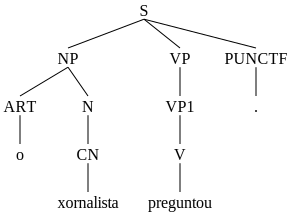



 hoxe o tamborileiro respondeu .

(S
  (ADVP (ADV hoxe))
  (NP (ART o) (N (CN tamborileiro)))
  (VP (VP1 (V respondeu)))
  (PUNCTF .))


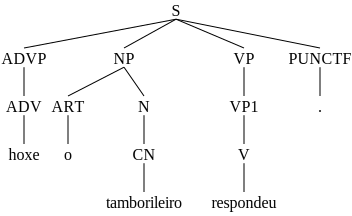



na charanga , o tamborileiro tocou algunha .

(S
  (PP (P (P/ART na)) (NP1 (N (CN charanga))))
  (PUNCTM ,)
  (NP (ART o) (N (CN tamborileiro)))
  (VP (VP1 (V tocou)) (NP (PRON (INPRON algunha))))
  (PUNCTF .))


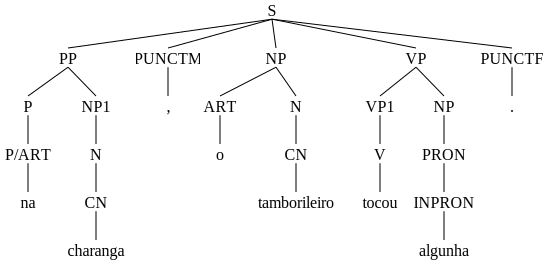

In [498]:
# Basic structure of subject and verb ended by a punctuation mark at the end - NP VP PUNCTF
# Subject and verb, but there is an adverbial phase that modifies all the sentence in the beginning, we also add the punctuation mark as
# if the ADVP is in the beginning and quite long, usually it is separated by comma from the subject - ADVP NP VP PUNCTF | ADVP PUNCTM NP VP PUNCTF 
# A prepositional phrase can also be in the beginning of the sentence, and the same happens with the use of the comma - PP NP VP PUNCTF | PP PUNCTM NP VP PUNCTF

sentences = ["o xornalista preguntou .", " hoxe o tamborileiro respondeu .", "na charanga , o tamborileiro tocou algunha ."]
# the journalist asked, today the drummer answered, in the band, the drummer played one

parsing_tree(sentences)

escribiu na libreta .

(S
  (VP (VP1 (V escribiu)) (PP (P (P/ART na)) (NP1 (N (CN libreta)))))
  (PUNCTF .))


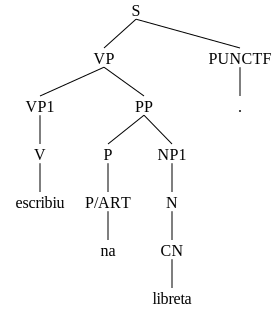



hai un tambor .

(S (VP (VP1 (V hai)) (NP (ART un) (N (CN tambor)))) (PUNCTF .))


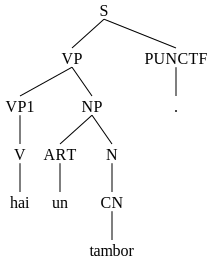



hoxe non hai .

(S (ADVP (ADV hoxe)) (VP (NEG non) (VP1 (V hai))) (PUNCTF .))


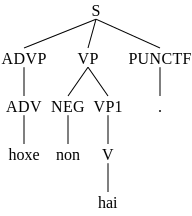



na charanga , hai un tamborileiro .

(S
  (PP (P (P/ART na)) (NP1 (N (CN charanga))))
  (PUNCTM ,)
  (VP (VP1 (V hai)) (NP (ART un) (N (CN tamborileiro))))
  (PUNCTF .))


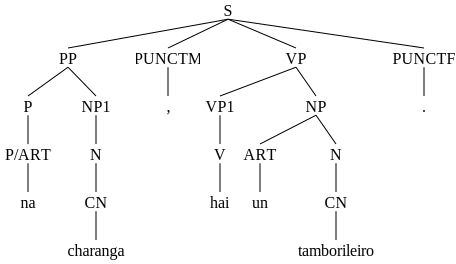

In [499]:
# The subject is ommited or it is an impersonal verb, the sentence ends by a final punctuation mark - VP PUNCTF
# The subject is ommited or it is an impersonal verb, but it starts with an adverbial phrase, we add PUNCTM due to the already mentioned reasons - ADVP VP PUNCTF
# A prepositional phrase can also be in the beginning of the sentence separated by comma or not - PP VP PUNCTF | PP PUNCTM VP PUNCTF

# In 'hoxe non hai' (ADV ADV V), we can also check how important was to add separately non in NEG.
# Otherwise, there would be ambiguity, for instance, between (VP(ADVP (ADV ADVP (ADV)) VP1 (V))),  (ADVP (ADV) VP (ADVP (ADV) VP1 (V))) or (ADVP (ADV ADVP (ADV)) VP (VP1 (V))).

sentences = ["escribiu na libreta .", "hai un tambor .", "hoxe non hai .", "na charanga , hai un tamborileiro ."]
# (he) wrote in the notebook, there is a drum, today there is not, in the band, thare is a drummer

parsing_tree(sentences)

#### Noun phrase - NP 

Martiño respondeu .

(S (NP (N (PN Martiño))) (VP (VP1 (V respondeu))) (PUNCTF .))


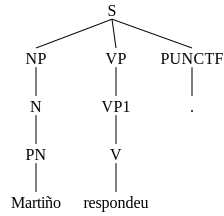



el escribiu na libreta .

(S
  (NP (PRON (PERPRON el)))
  (VP (VP1 (V escribiu)) (PP (P (P/ART na)) (NP1 (N (CN libreta)))))
  (PUNCTF .))


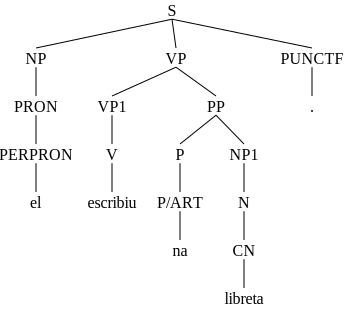



quen era alto ?

(S
  (NP (PRON (IEPRON quen)))
  (VP (VP1 (V (VAUX era))) (ADJP (ADJ alto)))
  (PUNCTF ?))


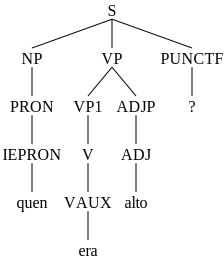

In [500]:
# The NP is composed just by a noun - N
# Or it is composed just by a kind of pronoun - PRON

sentences = ["Martiño respondeu .", "el escribiu na libreta .", "quen era alto ?"]
# Matiño asnwered, he wrote in the notebook, who was tall?

parsing_tree(sentences)

o xornalista fixo unha pregunta .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V fixo)) (NP (ART unha) (N (CN pregunta))))
  (PUNCTF .))


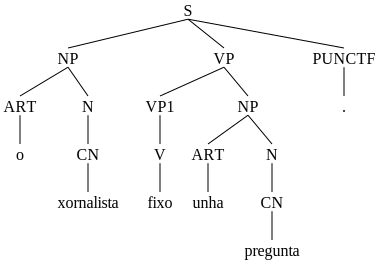



que tamborileiro tocou ?

(S
  (NP (DET (IEDET que)) (N (CN tamborileiro)))
  (VP (VP1 (V tocou)))
  (PUNCTF ?))


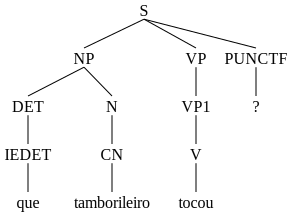

In [501]:
# Article and noun phrase - ART N
# Determiner and noun phrase- DET N

# In 'que tamborileiro tocou ?', we can also check that there could be ambiguity with the subordinate if we would not have separated 'que',
# as it woul be possible to parse it as (SUB S1 (NP (N) VP (VP1 (V))))

sentences = ["o xornalista fixo unha pregunta .", "que tamborileiro tocou ?"]
# a journalist made a question, which drummer played?

parsing_tree(sentences)

algún tamborileiro tiña o noso tamboril .

(S
  (NP (DET (INDET algún)) (N (CN tamborileiro)))
  (VP
    (VP1 (V tiña))
    (NP (ART o) (DET (PDET noso)) (N (CN tamboril))))
  (PUNCTF .))


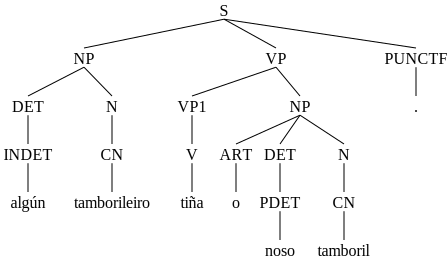



el tiña a miña .

(S
  (NP (PRON (PERPRON el)))
  (VP (VP1 (V tiña)) (NP (ART a) (PRON (PPRON miña))))
  (PUNCTF .))


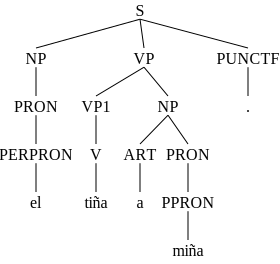

In [502]:
# Some determiners, as the possesives, are preceded by the article - ART DET N
# Possesive pronouns are also preceded by the article - ART PRON

sentences = ["algún tamborileiro tiña o noso tamboril .", "el tiña a miña ."]
# some drummer had our drum, he had mine

parsing_tree(sentences)

o alto xornalista fixo unha pregunta .

(S
  (NP (ART o) (ADJP (ADJ alto)) (N (CN xornalista)))
  (VP (VP1 (V fixo)) (NP (ART unha) (N (CN pregunta))))
  (PUNCTF .))


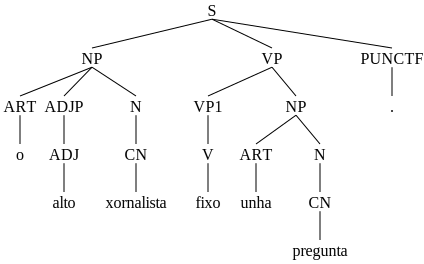



o tamborileiro tiña un tamboril bonito .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V tiña))
    (NP (ART un) (N (CN tamboril)) (ADJP (ADJ bonito))))
  (PUNCTF .))


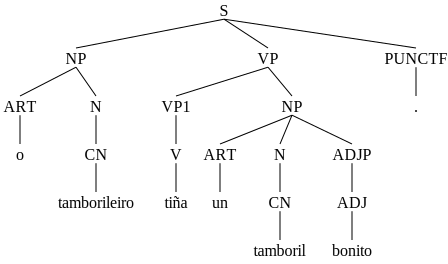



o feliz xornalista alto tiña unha libreta .

(S
  (NP
    (ART o)
    (ADJP (ADJ feliz))
    (N (CN xornalista))
    (ADJP (ADJ alto)))
  (VP (VP1 (V tiña)) (NP (ART unha) (N (CN libreta))))
  (PUNCTF .))


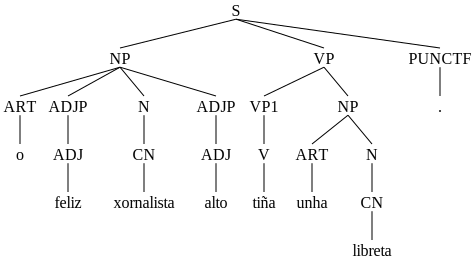

In [503]:
# It has an adjectival phrase before the noun - DET ADJP N | ART ADJP N
# It has an adjectival phrase after the noun - DET N ADJP | ART N ADJP
# It has an adjectival phrase before and after the noun - DET ADJP N ADJP | ART ADJP N ADJP

sentences = ["o alto xornalista fixo unha pregunta .", "o tamborileiro tiña un tamboril bonito .", "o feliz xornalista alto tiña unha libreta ."]
# the tall journalist made a question, the journalist had a drum nice, the happy journalist tall had a notebook

parsing_tree(sentences)

o xornalista cunha libreta preguntou iso .

(S
  (NP
    (NP (ART o) (N (CN xornalista)))
    (PP (P (P/ART cunha)) (NP1 (N (CN libreta)))))
  (VP (VP1 (V preguntou)) (NP (PRON (DPRON iso))))
  (PUNCTF .))


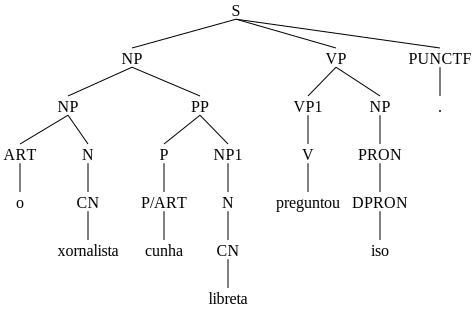



 o xornalista coa libreta na charanga preguntou iso .

(S
  (NP
    (NP
      (NP (ART o) (N (CN xornalista)))
      (PP (P (P/ART coa)) (NP1 (N (CN libreta)))))
    (PP (P (P/ART na)) (NP1 (N (CN charanga)))))
  (VP (VP1 (V preguntou)) (NP (PRON (DPRON iso))))
  (PUNCTF .))


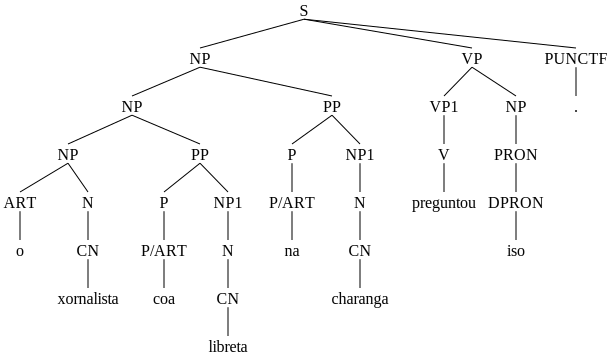

In [504]:
# The NP is also followed by a PP - NP PP
# Althought as we can check in the second example, it was needed to add NP1 to avoid ambiguity caused by the recursivity. Although, we have to take into account that,
# even if it is an uncommon structure, some PP are refered to the NP of the previous NP (for instance, with a child with a candy), and this grammar does not cover it.

sentences = ["o xornalista cunha libreta preguntou iso .", " o xornalista coa libreta na charanga preguntou iso ."]
# the journalist with a notebooked asked that, the journalist with a notebook in the parade asked that

parsing_tree(sentences)

#### Adjective phrase - ADJP

o tamborileiro era alto .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP (VP1 (V (VAUX era))) (ADJP (ADJ alto)))
  (PUNCTF .))


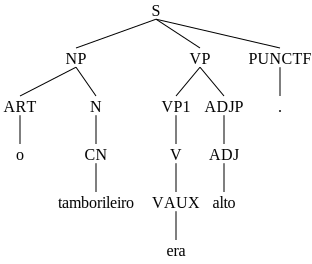

In [505]:
# It is just one adjective - ADJ

sentences = ["o tamborileiro era alto ."]
# the drummer was tall

parsing_tree(sentences)

o xornalista era moi alto .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V (VAUX era))) (ADJP (ADVP (ADV moi)) (ADJ alto)))
  (PUNCTF .))


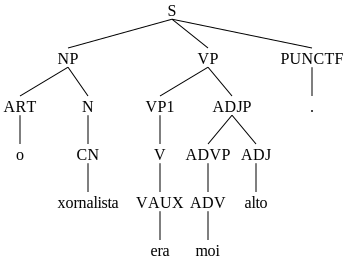

In [506]:
# The adjective is modified by an adverbial phrase - ADVP ADJ

sentences = ["o xornalista era moi alto ."]
# the journalist was very tall

parsing_tree(sentences)

#### Verb phrase - VP

toca .

(S (VP (VP1 (V toca))) (PUNCTF .))


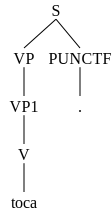



esta libreta era escrita polo xornalista .

(S
  (NP (DET (DDET esta)) (N (CN libreta)))
  (VP
    (VP1 (V (VAUX era)) (V escrita))
    (PP (P (P/ART polo)) (NP1 (N (CN xornalista)))))
  (PUNCTF .))


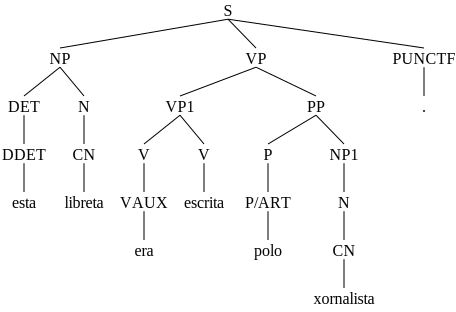



o tamborileiro desexou tocar o tamboril .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP (VP1 (V desexou) (V tocar)) (NP (ART o) (N (CN tamboril))))
  (PUNCTF .))


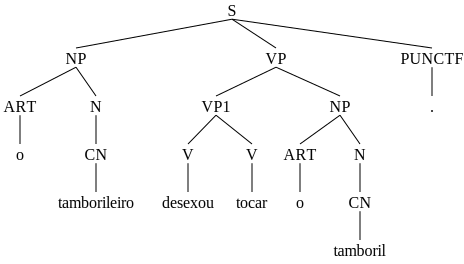

In [507]:
# To avoid ambiguity and recursivity, added VP1
# In VP1, if the VP is just a single verb - V
# In VP1, if the sentence is in passive so it has an auxiliary verb, or there are two verbs - V V
# So, this makes possible to have one verb or two independently on the structure following it (a noun phrase, an adjective phrase, etc.).

sentences = ["toca .", "esta libreta era escrita polo xornalista .", "o tamborileiro desexou tocar o tamboril ."]
# play, this notebook was written by the journalist , the drummer wanted to play the drum

parsing_tree(sentences)

o xornalista era alto .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V (VAUX era))) (ADJP (ADJ alto)))
  (PUNCTF .))


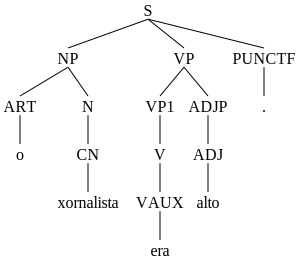

In [508]:
# It is a copulative verb so it has an attribute (adjective phrase) - VP1 ADJP

sentences = ["o xornalista era alto ."]
# the journalist was tall

parsing_tree(sentences)

este xornalista tiña dous bolígrafos .

(S
  (NP (DET (DDET este)) (N (CN xornalista)))
  (VP (VP1 (V tiña)) (NP (DET (NDET dous)) (N (CN bolígrafos))))
  (PUNCTF .))


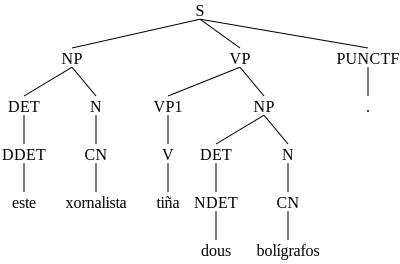

In [509]:
# The predicate has an object that it is a noun phrase - VP1 NP

sentences = ["este xornalista tiña dous bolígrafos ."]
# this journalist had two pens

parsing_tree(sentences)

o tamborileiro tocou o tambor na charanga .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V tocou))
    (NP
      (NP (ART o) (N (CN tambor)))
      (PP (P (P/ART na)) (NP1 (N (CN charanga))))))
  (PUNCTF .))


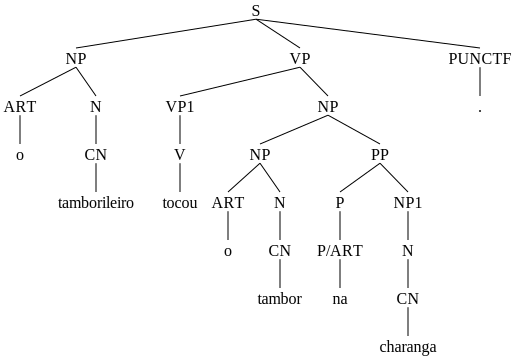



o tamborileiro tocou cun tambor na charanga .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V tocou))
    (PP (P (P/ART cun)) (NP1 (N (CN tambor))))
    (PP (P (P/ART na)) (NP1 (N (CN charanga)))))
  (PUNCTF .))


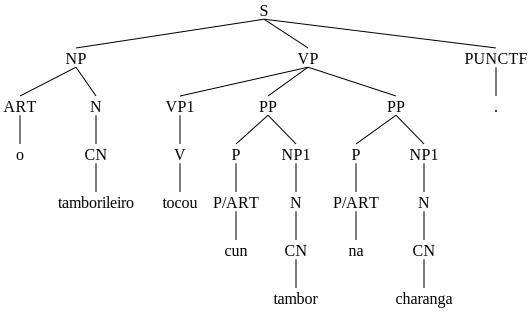

In [510]:
# It is followed by prepositional phraseS - VP1 PP | VP1 PP PP

sentences = ["o tamborileiro tocou o tambor na charanga .", "o tamborileiro tocou cun tambor na charanga ."]
# the drummer played the drum in the band, the drummer played with a drum in the band

parsing_tree(sentences)

o xornalista non escribiu .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (NEG non) (VP1 (V escribiu)))
  (PUNCTF .))


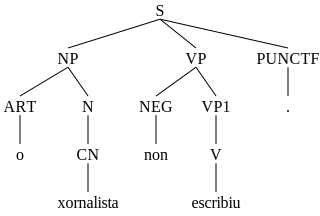



o xornalista escribiu onte .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V escribiu)) (ADVP (ADV onte)))
  (PUNCTF .))


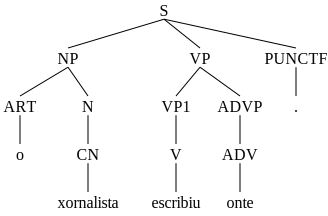



o xornalista non escribiu onte ?

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (NEG non) (VP1 (V escribiu)) (ADVP (ADV onte)))
  (PUNCTF ?))


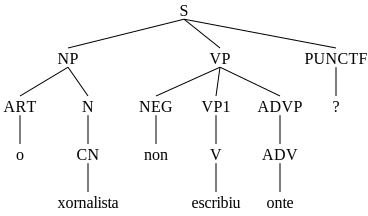

In [511]:
# The predicate has an adverbial phrase before (as in the negative phrases) - ADVP VP1 
# The predicate has an adverbial phrase after - VP1 ADVP
# The predicate has an adverbial phrase before and after - ADVP VP1 ADVP

sentences = ["o xornalista non escribiu .", "o xornalista escribiu onte .", "o xornalista non escribiu onte ?"]
# the journalist didn't write,  the journalist wrote yesterday, the journalist didn't write yesterday ?

parsing_tree(sentences)

#### Prepositional phrase - PP

o xornalista escribiu na libreta .

(S
  (NP (ART o) (N (CN xornalista)))
  (VP (VP1 (V escribiu)) (PP (P (P/ART na)) (NP1 (N (CN libreta)))))
  (PUNCTF .))


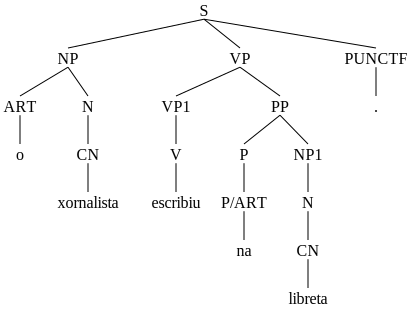



o xornalista cunha libreta preguntou iso .

(S
  (NP
    (NP (ART o) (N (CN xornalista)))
    (PP (P (P/ART cunha)) (NP1 (N (CN libreta)))))
  (VP (VP1 (V preguntou)) (NP (PRON (DPRON iso))))
  (PUNCTF .))


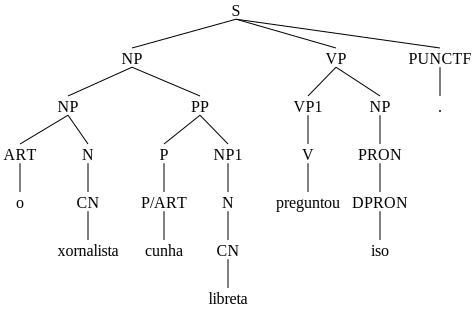



o tamborileiro tiña os tambores de noso .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V tiña))
    (NP
      (NP (ART os) (N (CN tambores)))
      (PP (P de) (NP1 (PRON (PPRON noso))))))
  (PUNCTF .))


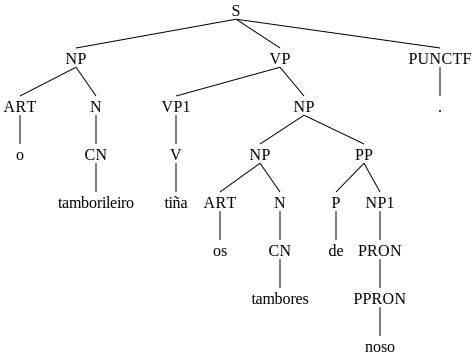

In [512]:
# The PP is composed by the preposition and a NP - P NP1
# As we already mentioned it was needed to create NP1 to avoid ambiguity

sentences = ["o xornalista escribiu na libreta .", "o xornalista cunha libreta preguntou iso .", "o tamborileiro tiña os tambores de noso ."]
# the journalist wrote in the notebook, the journalist with a notebook asked that, the journalist had the drums our (our drums)

parsing_tree(sentences)

#### Adverbial phrase - ADVP

Xoán escribiu moito .

(S
  (NP (N (PN Xoán)))
  (VP (VP1 (V escribiu)) (ADVP (ADV moito)))
  (PUNCTF .))


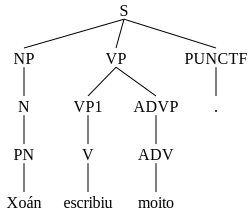

In [513]:
# The ADVP has just an adverb - ADV

sentences = ["Xoán escribiu moito ."]
# Xoán wrote a lot

parsing_tree(sentences)

Martiño era moi moi alto .

(S
  (NP (N (PN Martiño)))
  (VP
    (VP1 (V (VAUX era)))
    (ADJP (ADVP (ADV moi) (ADVP (ADV moi))) (ADJ alto)))
  (PUNCTF .))


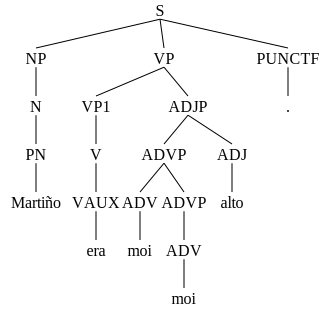

In [514]:
# It is composed by more than one adverb - ADV ADVP

sentences = ["Martiño era moi moi alto ."]
# Martiño was very very tall

parsing_tree(sentences)

### Complex syntatic rules
In this section, we will expand our basic grammar with more rules to deal with more complex cases but avoiding ambiguity.





#### Coordination

o tamborileiro era alto e forte .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V (VAUX era)))
    (ADJP (ADJP (ADJ alto)) (COORD e) (ADJP (ADJ forte))))
  (PUNCTF .))


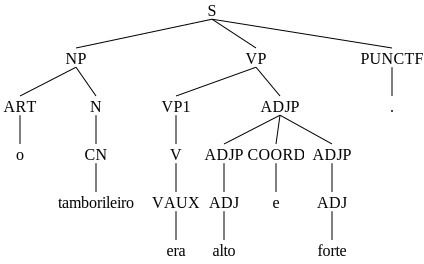



este tamborileiro tiña un tambor e un tamboril .

(S
  (NP (DET (DDET este)) (N (CN tamborileiro)))
  (VP
    (VP1 (V tiña))
    (NP
      (NP (ART un) (N (CN tambor)))
      (COORD e)
      (NP (ART un) (N (CN tamboril)))))
  (PUNCTF .))


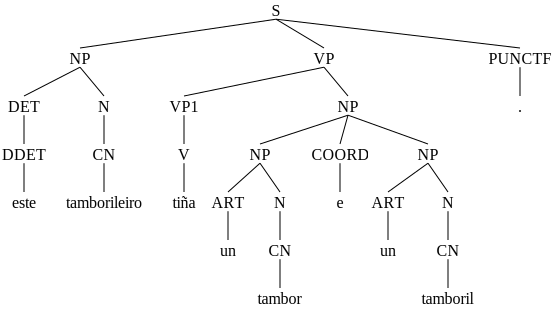



o tamborileiro tocou no desfile e na charanga tranquilamente e felizmente .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V tocou))
    (PP
      (PP (P (P/ART no)) (NP1 (N (CN desfile))))
      (COORD e)
      (PP (P (P/ART na)) (NP1 (N (CN charanga)))))
    (ADVP
      (ADVP (ADV tranquilamente))
      (COORD e)
      (ADVP (ADV felizmente))))
  (PUNCTF .))


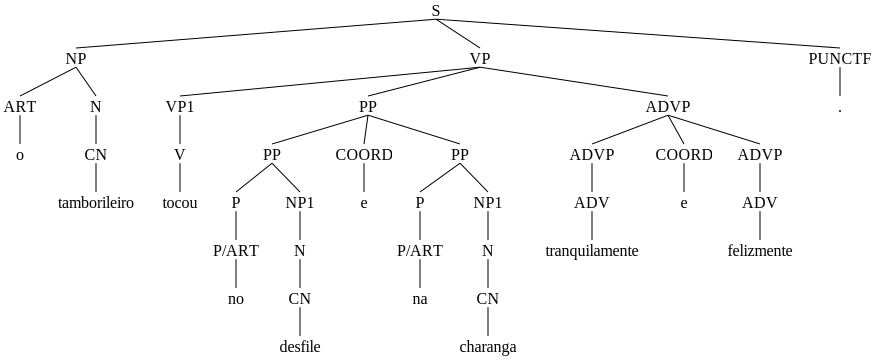



el era alto , forte e feliz .

(S
  (NP (PRON (PERPRON el)))
  (VP
    (VP1 (V (VAUX era)))
    (ADJP
      (ADJP (ADJ alto) (PUNCTM ,) (ADJ forte))
      (COORD e)
      (ADJP (ADJ feliz))))
  (PUNCTF .))


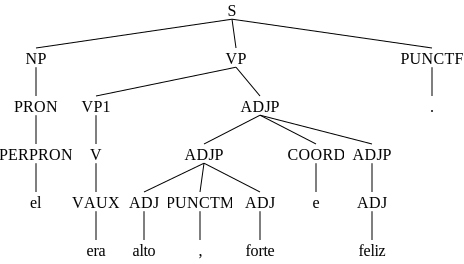

In [515]:
# Coordination of phrases
# We add these non-terminals to the corresponding type of phrases
# It can be between two noun phrases - NP COORD NP
# It can be between two adjective phrases - ADJP COORD ADJP
# It can be between two adverbial phrases - ADVP COORD ADVP
# It can be between two prepositional phrases - PP COORD PP
# As there can be more than two adjective phrases together, they are separated by commas, so we add in ADJP - ADJ PUNCTM ADJ

sentences = ["o tamborileiro era alto e forte .", "este tamborileiro tiña un tambor e un tamboril .",
             "o tamborileiro tocou no desfile e na charanga tranquilamente e felizmente .", "el era alto , forte e feliz ."]
# the drummer was tall and strong, this drummer had a drumma and an small drum, the drummer plaued in the parade and in the band calmly and happily, hew as tall, strong and happy

parsing_tree(sentences)

hoxe sarabiou no desfile e preguntoulle igualmente .

(S
  (S1
    (ADVP (ADV hoxe))
    (VP
      (VP1 (V sarabiou))
      (PP (P (P/ART no)) (NP1 (N (CN desfile))))))
  (COORD e)
  (S1 (VP (VP1 (V (V/PRON preguntoulle))) (ADVP (ADV igualmente))))
  (PUNCTF .))


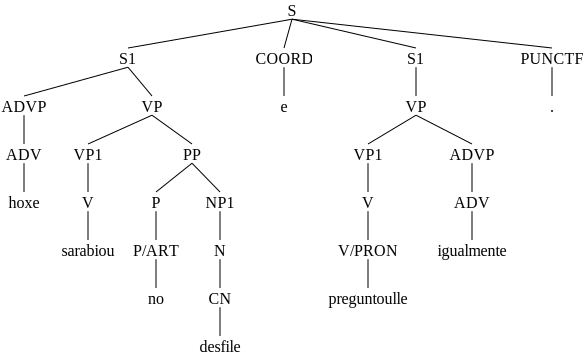



hoxe sarabiou no desfile , pero o tamborileiro tocou igualmente .

(S
  (S1
    (ADVP (ADV hoxe))
    (VP
      (VP1 (V sarabiou))
      (PP (P (P/ART no)) (NP1 (N (CN desfile)))))
    (PUNCTM ,))
  (COORD pero)
  (S1
    (NP (ART o) (N (CN tamborileiro)))
    (VP (VP1 (V tocou)) (ADVP (ADV igualmente))))
  (PUNCTF .))


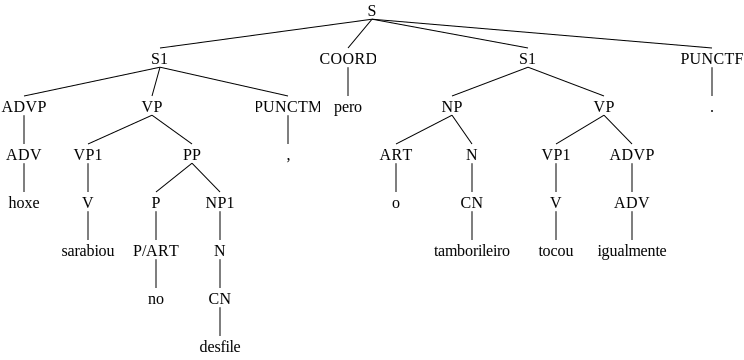



sarabiou e tocou ?

(S
  (S1 (VP (VP1 (V sarabiou))))
  (COORD e)
  (S1 (VP (VP1 (V tocou))))
  (PUNCTF ?))


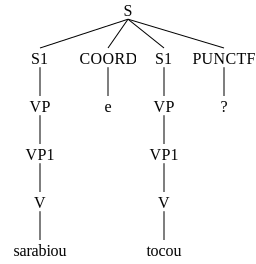

In [516]:
# Coordination of sentences
# In S. we added S1 COORD S1 PUNCTF, where S1 had all the basic structures of S but ended in comma (for instance, needed before the conjunction 'but')
# or without any punctuation mark. We added S1 in S, because both sentences are at the same level.

sentences = ["hoxe sarabiou no desfile e preguntoulle igualmente .", "hoxe sarabiou no desfile , pero o tamborileiro tocou igualmente .",
             "sarabiou e tocou ?"]
# today (it) hailed in the parade and asked him too, today (it) hailed in the parade, but the drummer played anyway, (it) hailed and played?

parsing_tree(sentences)

#### Subordination

se sarabiou , o tamborileiro non tocou .

(S
  (VP (SUB se) (S1 (VP (VP1 (V sarabiou))) (PUNCTM ,)))
  (NP (ART o) (N (CN tamborileiro)))
  (VP (NEG non) (VP1 (V tocou)))
  (PUNCTF .))


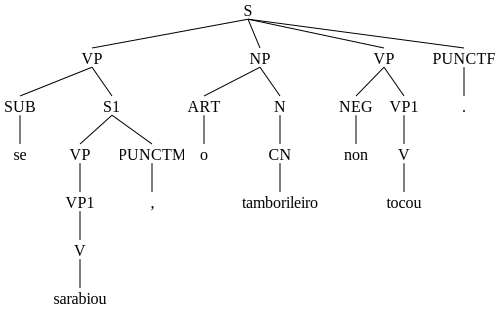



o tamborileiro non tocará se sarabia .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP (NEG non) (VP1 (V tocará)))
    (SUB se)
    (S1 (VP (VP1 (V sarabia)))))
  (PUNCTF .))


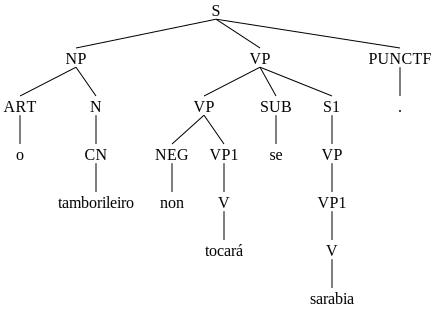



porque sarabiou no desfile , o tamborileiro non tocou .

(S
  (VP
    (SUB porque)
    (S1
      (VP
        (VP1 (V sarabiou))
        (PP (P (P/ART no)) (NP1 (N (CN desfile)))))
      (PUNCTM ,)))
  (NP (ART o) (N (CN tamborileiro)))
  (VP (NEG non) (VP1 (V tocou)))
  (PUNCTF .))


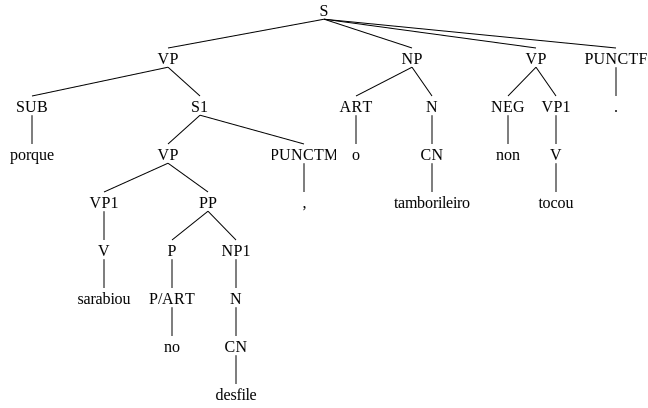



o tamborileiro respondeu que desexaba tocar .

(S
  (NP (ART o) (N (CN tamborileiro)))
  (VP
    (VP1 (V respondeu))
    (SUBM que)
    (S1 (VP (VP1 (V desexaba) (V tocar)))))
  (PUNCTF .))


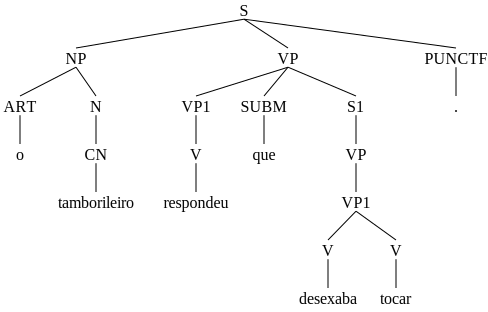

In [517]:
# Subordinates depend on their main clause, so we added VP SUB S1 | VP1 SUBM S1 in VP. SUBM just allows to be preceded by VP1 (common order) to avoid ambiguities if there are other
# phrases in the middle, for instance, with the relatives where there is a noun phrase following the verb.
# As we already mentioned, some kind of subordinate clauses can be written at the beginning so we added SUB S1 in VP (so que (that) can not start the sentence).
# In addition, in S we added VP NP VP PUNCTF, to indicate this subordinate structure.

sentences = ["se sarabiou , o tamborileiro non tocou .", "o tamborileiro non tocará se sarabia .", "porque sarabiou no desfile , o tamborileiro non tocou .",
             "o tamborileiro respondeu que desexaba tocar ."]
# if (it) hailed, the drummer didn't play / the drummer won't play if (it) hail / because (it) hailed in the parade, the drummer didn't play /
# the drummer answered that (he) wanted to play

parsing_tree(sentences)

o tamborileiro que tiña un tamboril non tocou .

(S
  (NP
    (NP (ART o) (N (CN tamborileiro)))
    (REL que)
    (S1 (VP (VP1 (V tiña)) (NP (ART un) (N (CN tamboril))))))
  (VP (NEG non) (VP1 (V tocou)))
  (PUNCTF .))


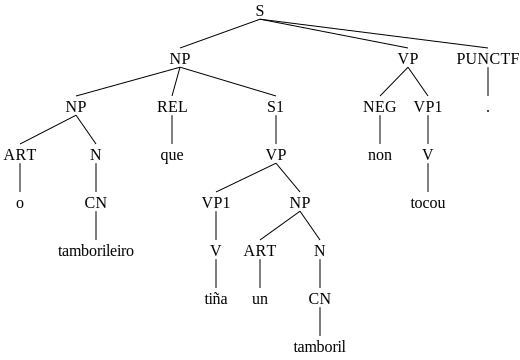



os tamborileiros , que eran altos , non tocarán se sarabia .

(S
  (NP
    (NP (ART os) (N (CN tamborileiros)))
    (PUNCTM ,)
    (REL que)
    (S1 (VP (VP1 (V (VAUX eran))) (ADJP (ADJ altos))) (PUNCTM ,)))
  (VP
    (VP (NEG non) (VP1 (V tocarán)))
    (SUB se)
    (S1 (VP (VP1 (V sarabia)))))
  (PUNCTF .))


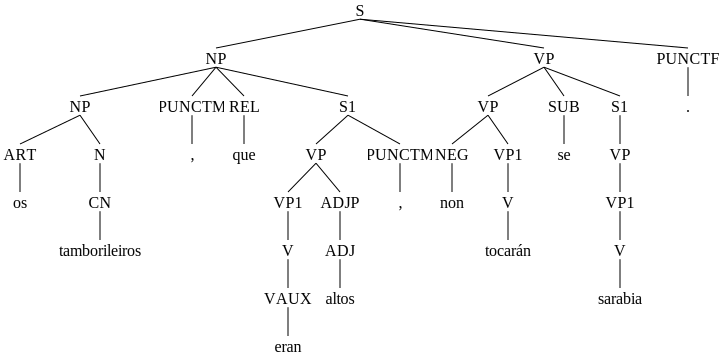



hai dous que tocan .

(S
  (VP
    (VP1 (V hai))
    (NP (NP (PRON (NPRON dous))) (REL que) (S1 (VP (VP1 (V tocan))))))
  (PUNCTF .))


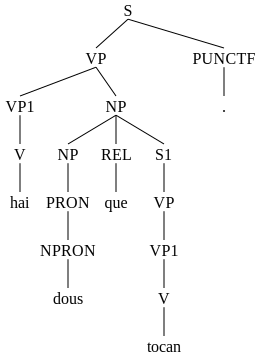

In [518]:
# Relative clauses
# Relative clauses modify a noun so we have to add the following non-terminal in NP - NP REL S1
# If the clause is not rectrictive it is surrounded by commas - NP PUNCTM REL S1

# In 'hai dous que tocan', we have to take into account how with the already mentioned changes related to the word 'que', we have avoided ambiguity.

sentences = ["o tamborileiro que tiña un tamboril non tocou .", "os tamborileiros , que eran altos , non tocarán se sarabia .", "hai dous que tocan ."]
# the drummer that had an small drumm didn't play / the drummers, which were tall, won't play if (it) hails / there are two that played

parsing_tree(sentences)

## Generate
In our case, as we did not take into account some issues as concordance, the sentences generated by our grammar does make sense in Galician.

In [519]:
from nltk.parse.generate import generate

for sentence in generate(grammar, n=25, depth=50):
     print(' '.join(sentence))

xornalista eran .
xornalista eran ?
xornalista eran !
xornalista era .
xornalista era ?
xornalista era !
xornalista preguntoulle .
xornalista preguntoulle ?
xornalista preguntoulle !
xornalista preguntou .
xornalista preguntou ?
xornalista preguntou !
xornalista respondeu .
xornalista respondeu ?
xornalista respondeu !
xornalista escribiu .
xornalista escribiu ?
xornalista escribiu !
xornalista escrita .
xornalista escrita ?
xornalista escrita !
xornalista hai .
xornalista hai ?
xornalista hai !
xornalista sarabiou .
